In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import shapiro, levene
from scipy.stats import mannwhitneyu
df = pd.read_csv(r"E:\5 Python\property.csv") 
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [10]:
# data cleaning
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         13580 non-null  object        
 1   Address        13580 non-null  object        
 2   Rooms          13580 non-null  int64         
 3   Type           13580 non-null  object        
 4   Price          13580 non-null  float64       
 5   Method         13580 non-null  object        
 6   SellerG        13580 non-null  object        
 7   Date           13580 non-null  datetime64[ns]
 8   Distance       13580 non-null  float64       
 9   Postcode       13580 non-null  float64       
 10  Bedroom2       13580 non-null  float64       
 11  Bathroom       13580 non-null  float64       
 12  Car            13518 non-null  float64       
 13  Landsize       13580 non-null  float64       
 14  BuildingArea   7130 non-null   float64       
 15  YearBuilt      8205

## Q2 : For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%.

In [3]:
data_2016 = df[df['Date'].dt.year == 2016]# Filter data for the year 2016

# Separate data into winter (October to March) and summer (April to September)
winter_months = data_2016[data_2016['Date'].dt.month.isin([10, 11, 12, 1, 2, 3])]
summer_months = data_2016[data_2016['Date'].dt.month.isin([4, 5, 6, 7, 8, 9])]

# Extract prices for each group
winter_prices = winter_months['Price']
summer_prices = summer_months['Price']

# Normality Test 
### Ho(null Hypothisis ) : Data for Winter/Summer Price is normal
### Ha(alternate Hypothisis) : Data for Winter/Summer Price is not normal

# -------------  Apply shapiro test  -------------- #

In [5]:
stat, p_value = stats.shapiro(winter_prices)  # Directly use the Series
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, P-value={p_value:.6f}")

# Hypothesis testing
if p_value < 0.05:
    print("  -> Reject the null hypothesis: Data for Winter price is not normal.")
else:
    print("  -> Fail to reject the null hypothesis: Data for Winter price is normal.")

Shapiro-Wilk Test: Stat=0.8233, P-value=0.000000
  -> Reject the null hypothesis: Data for Winter price is not normal.


In [6]:
stat, p_value = stats.shapiro(summer_prices)  # Directly use the Series
print(f"Shapiro-Wilk Test: Stat={stat:.4f}, P-value={p_value:.4f}")

# Hypothesis testing
if p_value < 0.05:
    print("  -> Reject the null hypothesis: Data for Summer price is not normal.")
else:
    print("  -> Fail to reject the null hypothesis: Data for Summer price is normal.")

Shapiro-Wilk Test: Stat=0.8512, P-value=0.0000
  -> Reject the null hypothesis: Data for Summer price is not normal.


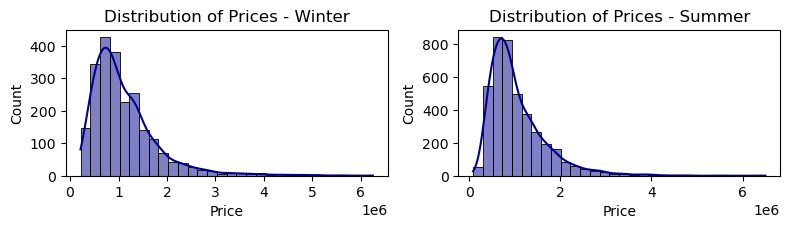

In [7]:
plt.figure(figsize=(8, 4))  # dimension of the graphs

plt.subplot(2, 2, 1)  # defining the position of the 1st graph
sns.histplot(winter_prices, bins=30, kde=True, color='darkblue')# Plot Winter prices
plt.title('Distribution of Prices - Winter')

plt.subplot(2, 2, 2)   # defining the position of the 2nd graph
sns.histplot(summer_prices, bins=30, kde=True, color='darkblue')# Plot Summer prices
plt.title('Distribution of Prices - Summer')

plt.tight_layout()# Adjust layout for better spacing
plt.show()

**Conclusion:**
- Winter Price Data:
Since the P-value is less than 0.05, we reject the null hypothesis. The data for winter prices is not normally distributed.

- Summer Price Data:
Similarly, the P-value is less than 0.05, leading to the rejection of the null hypothesis. The data for summer prices is also not normally distributed.

**Implications:**
- Non-Normality :
Neither dataset follows a normal distribution. This means that statistical methods relying on normality assumptions, such as t-tests or ANOVA, are not suitable for this data.

**Alternative Approaches:**
- Consider using non-parametric tests:
For comparing independent data (e.g., winter prices vs. summer prices), use the Mann-Whitney U Test.

# ------------ variance Test ------------
### Ho (null Hypothisis ): variance are equal
### Ha (alternate Hypothisis): variance are not equal

In [8]:

print("Variance Test (Levene's Test) for Winter And Summer prices is:")
stat, p_value = stats.levene(winter_prices,summer_prices)

print(f"Levene's Test: Stat={stat:.4f}, P-value={p_value:.4f}")
if p_value < 0.05:
    print("  -> Reject the null hypothesis: Variances are not equal.")
else:
    print("  -> Fail to reject the null hypothesis: Variances are equal.")

Variance Test (Levene's Test) for Winter And Summer prices is:
Levene's Test: Stat=9.0608, P-value=0.0026
  -> Reject the null hypothesis: Variances are not equal.


**Conclusion:**
This above result indicates that the variances of winter and summer prices are not equal. In other words, the data shows evidence of heteroscedasticity (unequal variability) between the two price distributions.

## Mann-Whitney U Test

- **Null Hypothesis (𝐻0): There is no difference in the mean property prices between summer and winter months.**
- **Alternative Hypothesis (𝐻1): There is a difference in the mean property prices between summer and winter months.**

**Interpret Results:**

- **If the p-value < 0.05, reject the null hypothesis. There is evidence of a significant difference in prices.**
- **If the p-value ≥ 0.05, fail to reject the null hypothesis. There is no significant difference in prices.**

In [9]:
from scipy.stats import mannwhitneyu
stat, p_value = mannwhitneyu(winter_prices, summer_prices, alternative='two-sided')

print(f"Mann-Whitney U Test: Stat={stat:.4f}, P-value={p_value:.6f}")

# Hypothesis testing Conclusion
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in property prices between summer and winter months.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in property prices between summer and winter months.")

Mann-Whitney U Test: Stat=4909922.0000, P-value=0.000125
Reject the null hypothesis: There is a significant difference in property prices between summer and winter months.


**Conclusion:**
- Since the P-value (0.000125) is much less than 0.05, we reject the null hypothesis.
This indicates that there is a statistically significant difference in property prices between the summer and winter months.


**Seasonal Variation:**
The significant difference suggests that property prices vary meaningfully between the two seasons. This could be due to factors such as market demand, seasonal preferences, or changes in property availability.

**Practical Impact:**
If we can analyze market trends or advising on buying/selling strategies, this insight can help highlight the influence of seasonality on property prices.

**Non-Normality and Unequal Variance:**
The Mann-Whitney U test was appropriate here because the data for both seasons was not normally distributed (as determined by the Shapiro-Wilk test) and had unequal variances (per Levene's test).